### Predicting if a person would buy life insurnace based on his age using logistic regression

###### Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('DATA FILES/insurance_data.csv')

In [5]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [7]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [8]:
# rows and columns
# 27 rows and 2 columns i.e age and insurance
df.shape

(27, 2)

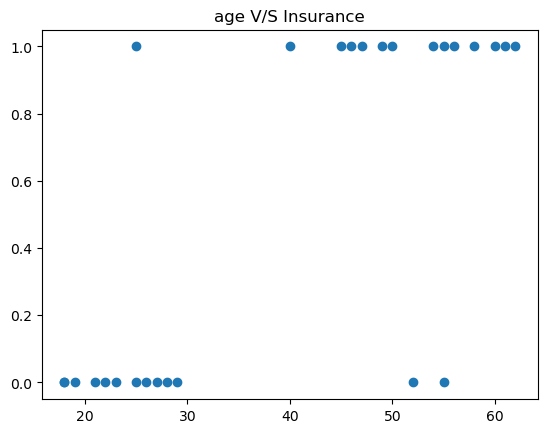

In [9]:
plt.title('age V/S Insurance')
plt.scatter(df['age'],df['bought_insurance'])
plt.show()

In [10]:
X = df['age']
X
# This selects one column from the DataFrame.

# But it gives you a Pandas Series — not a DataFrame.

# A Series is just a 1D object (a list with an index).

# we need to change this into 2D Data Frame then split into X and Y by putting double brackets

0     22
1     25
2     47
3     52
4     46
5     56
6     55
7     60
8     62
9     61
10    18
11    28
12    27
13    29
14    49
15    55
16    25
17    58
18    19
19    18
20    21
21    26
22    40
23    45
24    50
25    54
26    23
Name: age, dtype: int64

In [11]:
print(X.shape)

(27,)


In [12]:
X = df[['age']]
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [13]:
Y= df['bought_insurance']
Y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Train Test Split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [16]:
X_train

,age
16,25
17,58
12,27
24,50
1,25
4,46
5,56
2,47
15,55
22,40


In [17]:
Y_train

16    1
17    1
12    0
24    1
1     0
4     1
5     1
2     1
15    1
22    1
3     0
25    1
23    1
18    0
26    0
20    0
7     1
10    0
14    1
19    0
6     0
Name: bought_insurance, dtype: int64

In [18]:
df['age'].max()

62

In [19]:
df['bought_insurance'].max()

1

In [20]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28


In [21]:
Y_test

8     1
13    0
9     1
21    0
0     0
11    0
Name: bought_insurance, dtype: int64

In [22]:
# bari values dominate na karein esliye standard scaling use karte hain
# to bring all input features on same scale
# jese cgpa ki values choti hain or iq ki values numerically bari hain
# like amount of salt in food to taste balance
# ML ka model kisi column is bari values ko zyada imp samajh leta hai or biased hojata hai by default
# standard scaler: used when jab apko apni data ki initial or maximum range na pata ho 
# min max scaler: used when you know min max range of data like ilets ka max score max 8 hota hai

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler

StandardScaler()

In [25]:
# scaler x train or x test dono pe apply hota hai
# fit transform use jab apke model ne data ko dekha he na ho like x train
# only transform used when apke model ne data ko dekha ho woh trained ho like x test pe only transform use hoga jabke x train pe fit transform use hoga

In [26]:
# X_train = scaler.fit_transform(X_train)
# X_train

In [27]:
# logistic model is another name for classification model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
# model training
model.fit(X_train,Y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred

array([1, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
pd.DataFrame({'Y_test':Y_test, 'y_pred':y_pred})

,Y_test,y_pred
8,1,1
13,0,0
9,1,1
21,0,0
0,0,0
11,0,0


In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [33]:
accuracy_score(Y_test,y_pred)
# hamari kitni classes ko model ne sahi pick kiya hai / thek preeict kiya hai

1.0

In [34]:
# Precision ( True Positive + True Negative Rate) = mere model ne sahi ko kitni bar sahi kaha .
precision_score(Y_test,y_pred)

1.0

In [35]:
f1_score(Y_test,y_pred)

1.0

In [36]:
confusion_matrix(Y_test,y_pred)

array([[4, 0],
       [0, 2]], dtype=int64)

In [37]:
print('Classification_report:',classification_report(Y_test,y_pred))

Classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



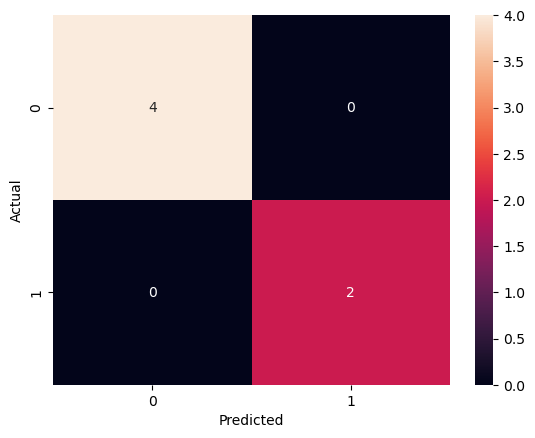

In [38]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
# model.coef_ indicates value of m in y=m*x + b equation
model.coef_

array([[0.11307708]])

In [40]:

# model.intercept_ indicates value of b in y=m*x + b equation

model.intercept_

array([-4.15311919])

In [41]:
# x is...	         Result of sigmoid(x) is...
# Big Negative	  Close to 0
# 0	              Exactly 0.5
# Big Positive	  Close to 1

# If the number is very negative, the answer is close to 0

# If the number is very positive, the answer is close to 1

# If the number is 0, the answer is exactly 0.5

# The sigmoid function squashes any number (positive or negative) into a value between 0 and 1 — like turning raw numbers into probabilities.

In [42]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [43]:
# Value of x	             Sigmoid output	                       As a %	Interpretation
# +5	                      ~0.993	                           99.3%	Very confident YES ✅
# 0	                        0.5	                               50%	Not sure 🤔
# -3.7	                    0.024	                           2.4%	Very confident NO ❌

In [44]:
# Positive x →      -x is negative →         small exp(-x) →        sigmoid ≈ 1

# Negative x →      -x is positive →         big exp(-x) →          sigmoid ≈ 0

In [45]:
# "If x is positive, -x becomes negative, exp(-x) is small, and sigmoid gives a value close to 1

# If x is negative, -x becomes positive, exp(-x) is big, and sigmoid gives a value close to 0"

In [46]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [47]:
age = 35
prediction_function(age)

0.4850044983805899

In [48]:
age = 43
prediction_function(age)

0.568565299077705